In [ ]:
### Function to get Maze layout with user input:

In [35]:
# Import libraries:
import numpy as np
import time
from utilities import *
import importlib
from matplotlib import pyplot as plt
%matplotlib inline


import params

importlib.reload(params)

# Generate grid and return X and Y co-ordinates of all the nodes:
[params.X,params.Y] = generate_grid()

setup_vectorization()



In [36]:
### 3. Run A* algorithm - Without graph!

# Setup the algorithm:

numNodes = len(params.X)


# Define the start and goal nodes:
startIdx = get_node_idx(0,0)
goalIdx =  get_node_idx(8.0,0.5)
epsilon = 50  # Weighting factor for the Heuristic:

start = time.time()
# Run the A* algorithm:
aStarPathIndices = astar_no_graph(startIdx,goalIdx, numNodes, epsilon)  

end = time.time()


timeAstar = end - start

print (" Time taken for A* without the Graph is : " , timeAstar ,  "secs")

 Time taken for A* without the Graph is :  2.438633441925049 secs


 Time taken for A* without the Graph is :  2.438633441925049 secs


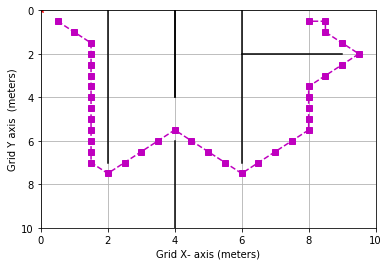

In [37]:
### Plot path generated by A* algorithm: 

# 1. The grid: 
# 2. The maze segments (Black solid lines)
# 3. The start (Red) and Goal (Green) nodes:
# 3. The shortest path (Purple line with markers)



# Start by plotting the maze segments: 
for mazeSeg in params.mazeSegments: 
    
    plt.plot([mazeSeg[0][0], mazeSeg[1][0]], [mazeSeg[0][1] , mazeSeg[1][1]],'-k')
    

# Plot the start and Goal nodes:
plt.plot(params.X[startIdx], params.Y[startIdx], 'r*')
plt.plot(params.X[goalIdx], params.Y[goalIdx], 'g*')

# Plot the shortest path:
plt.plot(params.X[aStarPathIndices], params.Y[aStarPathIndices], 'm--s')


# Set xLimit and yLimit: 
plt.xlim(0, params.widthX )
plt.ylim(0, params.widthY )
plt.grid()
plt.gca().invert_yaxis()

plt.xlabel('Grid X- axis (meters)')
plt.ylabel('Grid Y axis  (meters)')


timeAstar = end - start

print (" Time taken for A* without the Graph is : " , timeAstar ,  "secs")

# print(aStarPathIndices)

 The RRT path is: 
[ 8.0 0.5 ] -->[ 9.73446481279878 2.7707908683976914 ] -->[ 5.725782577286381 8.13064412224821 ] -->[ 4.800089905407026 5.7911365510827295 ] -->[ 4.048593012483979 4.866842676391978 ] -->[ 3.822531522522421 7.631536280819871 ] -->[ 3.997083616088618 8.05862044885071 ] -->[ 3.3349754289984075 8.808028714476407 ] -->[ 1.3638190215740298 9.14646987253763 ] -->[ 1.4710138582690002 4.9625888280027555 ] -->[ 1.9620063357848079 0.38798342534220664 ] -->0.0 0.0


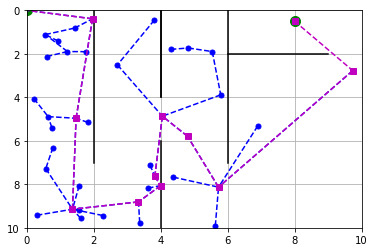

 Time taken for RRT is :  0.6537778377532959 secs


In [41]:
### 4. Run RRT planning algorithm: Many Thanks to Bijo Sebastian for providing this awesome implementation!

from RRT_utilities import *


# 1. Setup RRT:
start = Node(0.0, 0.0) # Start
goal = Node(8.0, 0.5) # Goal

# 2. Run the RRT algorithm and directly plot the path: 
startTime = time.time()
pathPoints = RRT(start, goal)
endTime = time.time()

timeRRT= endTime - startTime

print (" Time taken for RRT is : " , timeRRT ,  "secs")


In [40]:
### Testing : Vectorization of collision checks: 

# 1. Function to help with setup of vectorization: Has to be done only once: 
def setup_vectorization(): 
    
    
    for mazeSeg in params.mazeSegments: 
        
        #  The x and y co-ods of the start points of all segments
        params.Sx.append(mazeSeg[0][0])
        params.Sy.append(mazeSeg[0][1])
        
        #  The x and y co-ods of the end points of all segments
        params.Ex.append(mazeSeg[1][0])
        params.Ey.append(mazeSeg[1][1])
        
        
    
    params.Sx = np.asarray(params.Sx)
    params.Sy = np.asarray(params.Sy)
    params.Ex = np.asarray(params.Ex)
    params.Ey = np.asarray(params.Ey)
    
        
     
    return

# # 2. Baseline function compare against: Already defined!
# def checkIntersect_rrt(p,q): 
    
#     check


# 3. New collision check function:
def checkIntersect_rrt_vect(n1,n2): 
    
    p = [n1.x, n1.y]
    q = [n2.x, n2.y]
    
    
    # First setup the four vectors: 
    
#     (pb[0] - pa[0])*(pc[1] - pa[1]) -  (pc[0] - pa[0])*(pb[1] - pa[1])
    
    # 1. pqe:   e is the vector: Shape is (nSeg,1):
    pqe = np.sign((q[0] - p[0])*(params.Ey - p[1]) - (params.Ex - p[0])*(q[1] - p[1])) 
    
    
    # 2. pqs: s is the vector: Shape is (nSeg,1)
    pqs = np.sign ( (q[0] - p[0])*(params.Sy - p[1]) - (params.Sx - p[0])*(q[1] - p[1]) )
    
    # 3. sep : s and e are the vectors: Shape is (nSeg,1)
    sep = np.sign ( (params.Ex - params.Sx)*(p[1] - params.Sy) - (p[0] - params.Sx)*(params.Ey - params.Sy) )
    
    # 4. seq: s and e are the vectors: Shape is (nSeg,1): 
    seq = np.sign( (params.Ex - params.Sx)*(q[1] - params.Sy) - (q[0] - params.Sx)*(params.Ey - params.Sy) )
    
    
    # Now check for intersection: 
    
    # Case 1: 
    case1 = np.logical_and( pqe != pqs, sep !=seq )
    
    # Case 2: 
    case2 = np.logical_and( np.logical_and(pqe ==0 , pqs ==0) , np.logical_and(sep==0 , seq==0))
    
    
    if np.any(case1): 
        
        return True
    
    if np.any(case2): 
        
        return True
    
    return False




In [17]:
import numpy as np
d = np.asarray([1,-1,1])

e = np.asarray([-1,1,-1])

f = np.asarray([1,-1,1])

g = np.asarray([1,1,1])

c = np.logical_and( d!=e , f!=g)

print (c)
print (np.any(c))

[False  True False]
True


In [29]:
### Time the two functions: 

n1 = Node(1,2)
n2 = Node(2,10)


# Regular intersection check: 

sTime = time.time()

resReg = checkIntersect_rrt(n1,n2)

eTime = time.time()

print (" Regular intersection check takes " , eTime - sTime, " secs")

print (resReg)


# Vectorized intersection check: 

sTime = time.time()

resVec = checkIntersect_rrt_vect(n1,n2)

eTime = time.time()

print (" Vectorized intersection check takes " , eTime - sTime, " secs")

print (resVec)

 Regular intersection check takes  6.508827209472656e-05  secs
False
 Vectorized intersection check takes  0.00012040138244628906  secs
False
